In [24]:
import pandas as pd
import seaborn as sns
import numpy as np

# question 1

In [25]:
df = pd.DataFrame({
    'study_hours':[8 , 9 ,12, 3 , 5],
    'marks' : [70 , 75 , 98 , 45 , 66]
})

df

,study_hours,marks
0,8,70
1,9,75
2,12,98
3,3,45
4,5,66


In [26]:
df.corr(method='pearson')

,study_hours,marks
study_hours,1.000000,0.961017
marks,0.961017,1.000000


In [28]:
# Calculate the Pearson correlation coefficient
pearson_corr = np.corrcoef(df['study_hours'], df['marks'])[0, 1]

print("Pearson correlation coefficient:", pearson_corr)

Pearson correlation coefficient: 0.9610173301289758


<Axes: >

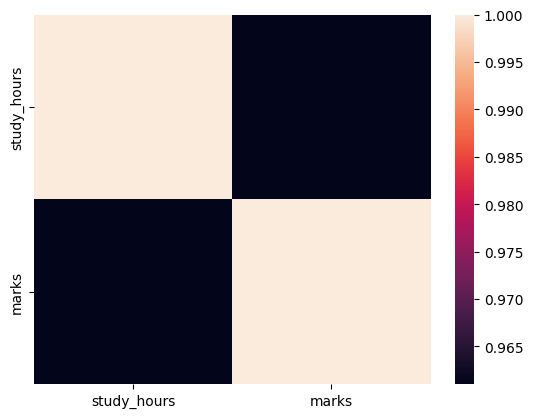

In [7]:
sns.heatmap(df.corr(method='pearson'))

By this we can interpret that as study hours increase, the marks score by the student also increase. Also ,  as study hours decrease, marks also decrease. (positive correlation)

# question 2

In [19]:
df = pd.DataFrame({
    'sleep_time':[8 , 9 , 4, 6 , 5],
    'job_satisfaction' : [7 , 9 , 3 , 5 , 6]
})

df

,sleep_time,job_satisfaction
0,8,7
1,9,9
2,4,3
3,6,5
4,5,6


In [20]:
df.corr(method='spearman')

,sleep_time,job_satisfaction
sleep_time,1.0,0.9
job_satisfaction,0.9,1.0


In [22]:
from scipy.stats import spearmanr

# Calculate the Spearman's rank correlation coefficient
spearman_corr, _ = spearmanr(df['sleep_time'], df['job_satisfaction'])

print("Spearman's rank correlation coefficient:", spearman_corr)

Spearman's rank correlation coefficient: 0.8999999999999998


<Axes: >

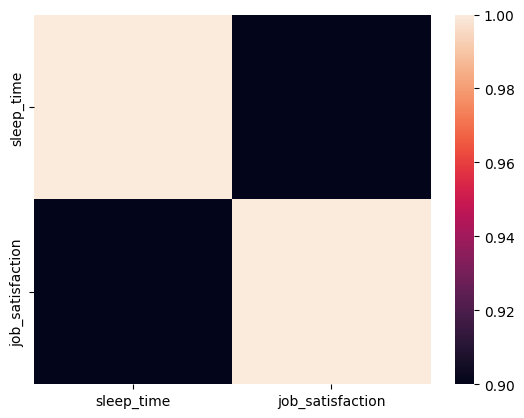

In [12]:
sns.heatmap(df.corr(method='spearman'))

We know that If ρ = 1, it indicates a perfect positive monotonic relationship. This means that as sleep duration increases, job satisfaction level also increases, and the relationship is entirely predictable and monotonic.

# question 3

To calculate the Pearson correlation coefficient and Spearman's rank correlation coefficient between the number of hours of exercise per week and body mass index (BMI) in a sample of adults, you can follow these steps:

Gather the data: Collect the data for both variables (hours of exercise per week and BMI) for each participant. Ensure that you have paired observations for each participant.

Calculate the Pearson correlation coefficient: Compute the Pearson correlation coefficient (r) to measure the linear relationship between the two variables. The Pearson correlation coefficient can be calculated using various statistical software or libraries. 

# Calculate the Pearson correlation coefficient
pearson_corr = np.corrcoef(hours_of_exercise, bmi)[0, 1]
    
The Pearson correlation coefficient (r) ranges between -1 and 1, where a value closer to -1 or 1 indicates a stronger linear relationship, and a value closer to 0 suggests a weaker linear relationship or no linear relationship.

Calculate the Spearman's rank correlation coefficient: Compute the Spearman's rank correlation coefficient (ρ) to measure the monotonic relationship between the two variables. The Spearman's rank correlation coefficient can also be calculated using statistical software or libraries. 

# Calculate the Spearman's rank correlation coefficient
spearman_corr, _ = spearmanr(hours_of_exercise, bmi)

The Spearman's rank correlation coefficient (ρ) ranges between -1 and 1, where a value closer to -1 or 1 indicates a stronger monotonic relationship, and a value closer to 0 suggests a weaker monotonic relationship or no monotonic relationship.

By calculating both the Pearson correlation coefficient and the Spearman's rank correlation coefficient, you can compare the results to assess whether the relationship between hours of exercise per week and BMI is more accurately described as a linear relationship (Pearson) or a monotonic relationship (Spearman) in your sample of adults.


# question 4

To calculate the Pearson correlation coefficient between the number of hours individuals spend watching television per day and their level of physical activity, you can follow these steps:

Gather the data: Collect the data for both variables (hours of TV watching per day and physical activity level) for each participant. Ensure that you have paired observations for each participant.
    
Calculate the Pearson correlation coefficient: Compute the Pearson correlation coefficient (r) to measure the linear relationship between the two variables. The Pearson correlation coefficient can be calculated using various statistical software or libraries. 
    
# Calculate the Pearson correlation coefficient
pearson_corr = np.corrcoef(hours_tv, physical_activity)[0, 1]

The Pearson correlation coefficient (r) ranges between -1 and 1, where a value closer to -1 or 1 indicates a stronger linear relationship, and a value closer to 0 suggests a weaker linear relationship or no linear relationship.




# question 5

In [30]:
df = pd.DataFrame({
    'age':[25,42,37,19,31,28],
    'soft_drink_preference' : ['coke' , 'pepsi' , 'mountain dew' , 'coke' , 'pepsi', 'coke']
})

df

,age,soft_drink_preference
0,25,coke
1,42,pepsi
2,37,mountain dew
3,19,coke
4,31,pepsi
5,28,coke


In [33]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
encoder = OneHotEncoder()
encoding = encoder.fit_transform(df[['soft_drink_preference']])
encoding

<6x3 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [44]:
encoded_df = pd.DataFrame(encoding.toarray() , columns = encoder.get_feature_names_out())
encoded_df

,soft_drink_preference_coke,soft_drink_preference_mountain dew,soft_drink_preference_pepsi
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [48]:
df = df.drop(df[['soft_drink_preference']] , axis=1)

In [51]:
final_df = pd.concat([df , encoded_df] , axis=1)

In [52]:
final_df

,age,soft_drink_preference_coke,soft_drink_preference_mountain dew,soft_drink_preference_pepsi
0,25,1.0,0.0,0.0
1,42,0.0,0.0,1.0
2,37,0.0,1.0,0.0
3,19,1.0,0.0,0.0
4,31,0.0,0.0,1.0
5,28,1.0,0.0,0.0


In [53]:
final_df.corr(method='pearson')

,age,soft_drink_preference_coke,soft_drink_preference_mountain dew,soft_drink_preference_pepsi
age,1.000000,-0.837240,0.394132,0.576439
soft_drink_preference_coke,-0.837240,1.000000,-0.447214,-0.707107
soft_drink_preference_mountain dew,0.394132,-0.447214,1.000000,-0.316228
soft_drink_preference_pepsi,0.576439,-0.707107,-0.316228,1.000000


as age increases, it is found that preference of coke is reduced. Also as age increases people tend to prefer pepsi over mountain dew.

# question 6

To calculate the Pearson correlation coefficient between the number of sales calls made per day and the number of sales made per week, you can follow these steps:

Gather the data: Collect the data for both variables (sales calls per day and sales per week) for each sales representative. Ensure that you have paired observations for each representative.
    
Calculate the Pearson correlation coefficient: Compute the Pearson correlation coefficient (r) to measure the linear relationship between the two variables. The Pearson correlation coefficient can be calculated using various statistical software or libraries.
    
    # Calculate the Pearson correlation coefficient
pearson_corr = np.corrcoef(sales_calls_per_day, sales_per_week)[0, 1]

The Pearson correlation coefficient (r) ranges between -1 and 1, where a value closer to -1 or 1 indicates a stronger linear relationship, and a value closer to 0 suggests a weaker linear relationship or no linear relationship.

By examining the correlation coefficient, you can assess the strength and direction of the linear relationship between the number of sales calls and the number of sales. A positive correlation coefficient indicates that as the number of sales calls increases, the number of sales also tends to increase. A negative correlation coefficient indicates an inverse relationship, where as the number of sales calls increases, the number of sales tends to decrease. The magnitude of the coefficient indicates the strength of the relationship, with values closer to -1 or 1 indicating a stronger linear relationship.